In [2]:
from granad import core, wrappers
import jax.numpy as jnp
import jax
import numpy as np

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


## Plotting eigenstates of nanoflakes

**Contents of this notebook:**   
Example 5.1. Plotting eigenstates in 2D.
Example 5.2. Plotting eigenstates in 3D.

----------------------------

Here, we will create plots which show the distribution of eigenstates on the sites in real space.

First, we will create a triangular graphene flake as described in tutorial 01.
Next, we will attach an adatom to as shown in tutorial 02.
Last, we will plot the eigenstate distribution in real space.

### Example 5.1. Plotting eigenstates in 2D

What we will use here is a convenience funtcion: `show_eigenstate2D()`. It shows a 2D scatter plot of how selected orbitals in a stack contribute to an eigenstate.\
In the plot, orbitals are annotated with a color. The color corresponds either to the contribution to the selected eigenstate or to the type of the orbital.\
Optionally, orbitals can be annotated with a number corresponding to the hilbert space index.

Available are the following parameters:
- `stack` - the only obligatory argument pointing to the object representing system state
- `show_state` - the eigenstate index to show (0 => eigenstate with lowest energy)
- `show_orbitals` - list of strings with orbitals to show; if None, all orbitals are shown
- `indicate_size` : if True, bigger points are orbitals contributing more strongly to the selected eigenstate
- `color_orbitals` : if True, identical orbitals are colored identically and a legend is displayed listing al the different orbital types; if False, the color corresponds to the contribution to the selected eigenstate.
- `annotate_hilbert` : if True, the orbitals are annotated with a number corresponding to the hilbert space index

/home/julia/.local/lib/python3.10/site-packages/matplotlib/axes/_axes.py:4411: ComplexWarning: Casting complex values to real discards the imaginary part
  c = np.asanyarray(c, dtype=float)


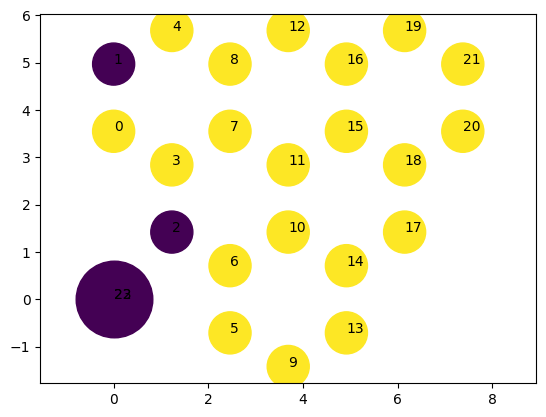

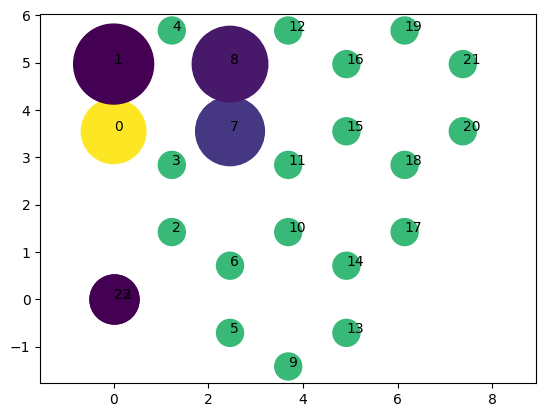

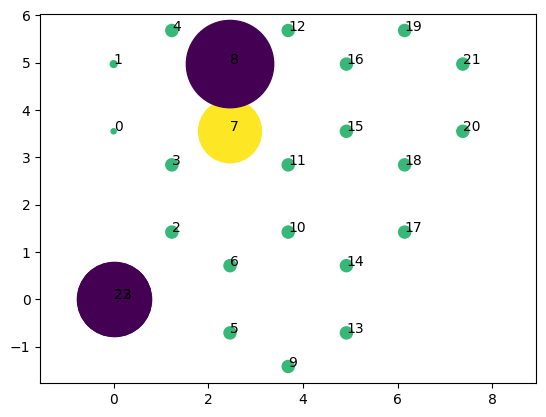

In [6]:
cc_distance = 2.46/np.sqrt(3)            
graphene_zigzag_unit = wrappers.unit_cells['zigzag'] * cc_distance
graphene_zigzag_scale = wrappers.scales['zigzag'] * cc_distance

orbs = core.get_orbitals(core.triangle(3), graphene_zigzag_unit, graphene_zigzag_scale, 'graphene', shift = jnp.zeros(3))

h_dict = {}
c_dict = {}

orbs_in_uc = cc_distance * jnp.array(
    [
        [0, 0, 0],
        [1, 0, 0],
        [-1 / 2, -jnp.sqrt(3) / 2, 0],
        [-1 / 2, -jnp.sqrt(3) / 2, 0],
    ]
)

h_dict[('graphene', 'graphene')] = core.neighbour_coupling( graphene_zigzag_unit, orbs_in_uc, [0, -2.66 + 0j])
c_dict[('graphene', 'graphene')] = core.neighbour_coupling( graphene_zigzag_unit, orbs_in_uc, [16.522 + 0j, 8.64 + 0j, 5.333 + 0j], lambda r :  27.21*0.52918/r + 0j)

stack = core.get_stack( orbs, h_dict, c_dict, doping = 2 )

h_dict[('A', 'A')] = jax.jit(lambda d : 0j) 
h_dict[('B', 'B')] = jax.jit(lambda d : 1.0 + 0j) 
h_dict[('A', 'B')] = jax.jit(lambda d : 0.5 + 0j) 

h_dict[('A', 'graphene')] = jax.jit(lambda d : 2.66 + 0.0j) 
h_dict[('B', 'graphene')] = jax.jit(lambda d : 2.66 + 0.0j)

c_dict[('A', 'A')] = jax.jit(lambda d : 0j) 
c_dict[('B', 'B')] = jax.jit(lambda d : 1.0 + 0j) 
c_dict[('A', 'B')] = jax.jit(lambda d : 0.5 + 0j) 

c_dict[('A', 'graphene')] = jax.jit(lambda d : 0-2.66 + 0.0j) 
c_dict[('B', 'graphene')] = jax.jit(lambda d : -2.66 + 0.0j)

adatom_position = np.zeros(3)

orbs.append(core.Orbital( orbital_ident = 'A', position = adatom_position))
orbs.append(core.Orbital( orbital_ident = 'B', position = adatom_position))

stack = core.get_stack(orbs, h_dict, c_dict)

for state in range(3):
    wrappers.show_eigenstate2D(stack, show_state=state, indicate_size = True, color_orbitals=False)

### Example 5.1. Plotting eigenstates in 3D

In turn, here, we will make use of the `show_eigenstate3D()`, which is parallel to the method showcased above, but used in case of 3-dimensional stacks.\
It also takes in analogous arguments, so should not cause any misconceptions.

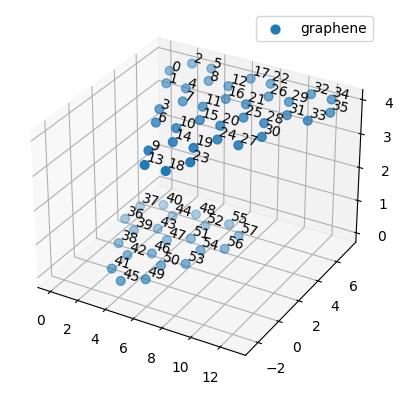

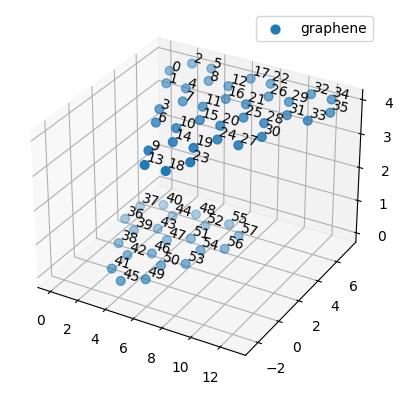

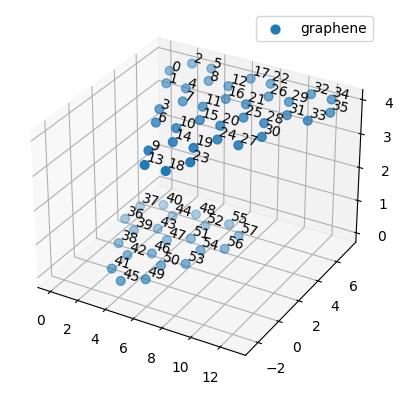

In [14]:
graphene_armchair_unit = wrappers.unit_cells['armchair'] * cc_distance
graphene_armchair_scale = wrappers.scales['armchair'] * cc_distance
orbs_a = core.get_orbitals(core.triangle(3), graphene_armchair_unit, graphene_armchair_scale, 'graphene', shift = jnp.array([0, 0, 4]))

graphene_zigzag_unit = wrappers.unit_cells['zigzag'] * cc_distance
graphene_zigzag_scale = wrappers.scales['zigzag'] * cc_distance
orbs_z = core.get_orbitals(core.triangle(3), graphene_zigzag_unit, graphene_zigzag_scale, 'graphene', shift = jnp.zeros(3))

orbs = np.concatenate((orbs_a, orbs_z))

h_dict = {}
c_dict = {}
h_dict[('graphene', 'graphene')] = jax.jit(lambda d : -2.66 * d**2 + 0.0j)
c_dict[('graphene', 'graphene')] = jax.jit(lambda d : 0j)
stack = core.get_stack( orbs, h_dict, c_dict, doping = 2 )

wrappers.show_eigenstate3D(stack, indicate_size = False)

for state in range(3, 5):
    wrappers.show_eigenstate3D(stack, show_state=state, indicate_size = False, color_orbitals=True)